In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import joblib

from data_preprocessing_EG import pipeline
from feature_preprocessing_EG2 import pipeline2

### 데이터 전처리

In [2]:
file_path = "./storage/raw_data/병합_청약매물_목록_정보_픽스2.csv"
# df = pd.read_csv(file_path, encoding ='cp949')
df = pd.read_csv(file_path)

C:\Users\user\AppData\Local\Temp\ipykernel_16220\2437011318.py:3: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [3]:
# 로우 데이터 불러오기
file_path = "./storage/raw_data/병합_청약매물_목록_정보_픽스2.csv"
# df = pd.read_csv(file_path, encoding ='cp949')
df = pd.read_csv(file_path)

# 데이터 전처리````
preprocessing_pipeline = pipeline(type='train')
df = preprocessing_pipeline.transform(df)

#칼럼정리(시세차익 있)
df['시세차익'] = df['전용면적'] * df['전용면적당 시세차익']
df.drop(columns=['전용면적', '전용면적당 시세차익', '거래금액(만원)', '공급금액(최고가 기준)'], inplace=True)

# 파일 저장
file_version = "lightgbm_final"
output_file = f"./storage/train_data/train-{file_version}.csv"
df.to_csv(output_file, index=False, encoding='cp949')

C:\Users\user\AppData\Local\Temp\ipykernel_16220\1756485055.py:4: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
c:\Users\user\mid-project\src\data_preprocessing_EG.py:146: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estate_price = pd.read_csv(csv_path, encoding="cp949")
c:\Users\user\mid-project\src\data_preprocessing_EG.py:329: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['최

### 모델 학습 및 평가

In [4]:
# 전처리된 데이터 가져오기

# file_version = "250317-01"
# file_path = f"./storage/train_data/t``ain-{file_version}.csv"
# df = pd.read_csv(file_path, encoding='cp949')

df = pd.read_csv("./storage/train_data/train-lightgbm_final.csv", encoding = 'cp949')
df.columns


Index(['공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구', '공급세대수', '접수건수',
       '경쟁률', '최저당첨가점', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7',
       '법정동코드', '시세차익'],
      dtype='object')

In [5]:
X = df.drop(columns=["최저당첨가점"])
Y = df["최저당첨가점"]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # 타겟(최저당첨가점) 제외
    Y,  # 타겟
    test_size=0.2,
    random_state=42
)

# 분양가상한제, 투기과열지구, 조정대상지역 -> 고려해보기염

In [11]:
feature_pipeline = pipeline2()

# 학습 데이터(X_train)에 fit
feature_pipeline.fit(X_train)

# 학습 데이터(X_train)를 변환
X_train_transformed = feature_pipeline.transform(X_train)

# 테스트 데이터(X_test)를 변환
X_test_transformed = feature_pipeline.transform(X_test)

Index(['공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구', '공급세대수', '접수건수',
       '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',
       '시세차익'],
      dtype='object')
Index(['공급규모', '공급세대수', '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '법정동코드', '시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N',
       '조정대상지역_Y', '분양가상한제_N', '분양가상한제_Y', '정비사업_N', '정비사업_Y', '공공주택지구_N',
       '공공주택지구_Y'],
      dtype='object')
⚠️ Warning: 새로운 법정동코드 발견 {'1156011000.0', '4125010300.0', '4137012200.0', '4139012700.0', '4111514000.0', '4143011000.0', '4148025327.0'}. 'unknown'으로 대체합니다.
Index(['공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구', '공급세대수', '접수건수',
       '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '법정동코드',
       '시세차익'],
      dtype='object')
Index(['공급규모', '공급세대수', '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '법정동코드', '시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N',
       '조정대상지역_Y', '분

c:\Users\user\anaconda3\envs\env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [7]:
joblib.dump(feature_pipeline, "./storage/trained_pipeline/pipeline_0.0.1.pkl")

['./storage/trained_pipeline/pipeline_0.0.1.pkl']

In [12]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2384 entries, 1991 to 860
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   공급규모      2384 non-null   float64
 1   공급세대수     2384 non-null   float64
 2   접수건수      2384 non-null   float64
 3   경쟁률       2384 non-null   float64
 4   토픽 1      2384 non-null   float64
 5   토픽 2      2384 non-null   float64
 6   토픽 3      2384 non-null   float64
 7   토픽 4      2384 non-null   float64
 8   토픽 5      2384 non-null   float64
 9   토픽 6      2384 non-null   float64
 10  토픽 7      2384 non-null   float64
 11  법정동코드     2384 non-null   int32  
 12  시세차익      2384 non-null   float64
 13  투기과열지구_N  2384 non-null   bool   
 14  투기과열지구_Y  2384 non-null   bool   
 15  조정대상지역_N  2384 non-null   bool   
 16  조정대상지역_Y  2384 non-null   bool   
 17  분양가상한제_N  2384 non-null   bool   
 18  분양가상한제_Y  2384 non-null   bool   
 19  정비사업_N    2384 non-null   bool   
 20  정비사업_Y    2384 non-null   bool   

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

각 Fold의 RMSE: [5.850202204034682, 5.303346496985271, 6.057409223335648, 5.5137706966827595, 5.2466118919296685]
평균 RMSE: 5.594268102593605
Feature Importance (평균):
공급규모: 0.0116
공급세대수: 0.0154
접수건수: 0.0121
경쟁률: 0.8024
토픽 1: 0.0098
토픽 2: 0.0097
토픽 3: 0.0095
토픽 4: 0.0143
토픽 5: 0.0105
토픽 6: 0.0103
토픽 7: 0.0096
법정동코드: 0.0100
시세차익: 0.0339
투기과열지구_N: 0.0007
투기과열지구_Y: 0.0007
조정대상지역_N: 0.0149
조정대상지역_Y: 0.0136
분양가상한제_N: 0.0008
분양가상한제_Y: 0.0009
정비사업_N: 0.0012
정비사업_Y: 0.0013
공공주택지구_N: 0.0006
공공주택지구_Y: 0.0006
대규모택지개발지구_N: 0.0005
대규모택지개발지구_Y: 0.0006
수도권내민영공공주택지구_N: 0.0002
수도권내민영공공주택지구_Y: 0.0002
순위_1순위: 0.0000
거주지역_기타지역: 0.0005
거주지역_해당지역: 0.0005
공급지역코드_100: 0.0004
공급지역코드_400: 0.0024
공급지역코드_410: 0.0005


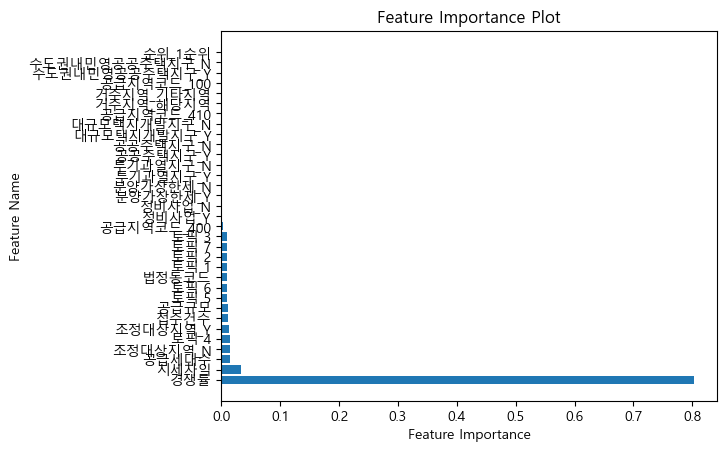

In [ ]:
#from sklearn.model_selection import KFold
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
#import numpy as np

# 1. 랜덤포레스트 모델 고정
#model = RandomForestRegressor(
#    n_estimators=100,
#    max_depth=None,
#    random_state=42
#)

# 2. K-Fold 교차 검증 설정 (5개 폴드로 나누기)
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

#  3. MAE, RMSE 저장할 리스트
#mae_scores = []
#rmse_scores = []
#feature_importances = []

# 4. K-Fold 반복문 (5번 반복)
#for train_index, test_index in kf.split(X_train_transformed):
#    X_tr, X_val = X_train_transformed.iloc[train_index], X_train_transformed.iloc[test_index]
#    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

    # 5. 모델 훈련
#    model.fit(X_tr, y_tr)
    
    # 6. 예측값 뽑기
#    y_pred = model.predict(X_val)
    
    # 7. MAE & RMSE 계산
#    mae = mean_absolute_error(y_val, y_pred)
#    rmse = root_mean_squared_error(y_val, y_pred)
    
    # 8. 결과 저장
#    mae_scores.append(mae)
#    rmse_scores.append(rmse)
    
    # 9. Feature Importance 저장
#    feature_importances.append(model.feature_importances_)

#  10. 결과 출력
#print(f"각 Fold의 RMSE: {rmse_scores}")
#print(f"평균 RMSE: {np.mean(rmse_scores)}")


# Feature Importance 평균 계산 및 출력
#avg_feature_importances = np.mean(feature_importances, axis=0)
#print("Feature Importance (평균):")
#for i, col in enumerate(X_train_transformed.columns):
#    print(f"{col}: {avg_feature_importances[i]:.4f}")

# Feature Importance 시각화
#import matplotlib.pyplot as plt

#sorted_idx = np.argsort(avg_feature_importances)[::-1]
#plt.barh(X_train_transformed.columns[sorted_idx], avg_feature_importances[sorted_idx])
#plt.xlabel("Feature Importance")
#plt.ylabel("Feature Name")
#plt.title("Feature Importance Plot")
#plt.show()


### 모델 저장 

In [ ]:
'''
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Grid Search 파라미터 설정
xgb_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Grid Search 수행
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_xgb = xgb_grid_search.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R^2: {r2_xgb}")

# 최적의 파라미터 출력
print("Best parameters:")
for param, value in xgb_grid_search.best_params_.items():
    print(f"{param}: {value}")
    '''


XGBoost - RMSE: 4.987255525958943, R^2: 0.879832872804602
Best parameters:
colsample_bytree: 1.0
learning_rate: 0.1
max_depth: 3
n_estimators: 500
subsample: 0.8


In [ ]:
"""
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

# 중요 변수 추출 (수정됨)
feature_importance = xgb_grid_search.best_estimator_.feature_importances_

# 변수명과 중요도를 데이터프레임으로 저장 (수정됨)
feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()
"""

SyntaxError: incomplete input (634901600.py, line 20)

In [13]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# LightGBM 모델 생성
lgb_model = lgb.LGBMRegressor(verbose=-1)

# Grid Search 파라미터 설정
lgb_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'num_leaves': [15, 31],
}


# Grid Search 수행
lgb_grid_search = GridSearchCV(lgb_model, lgb_param_grid, cv=5)
lgb_grid_search.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_lgb = lgb_grid_search.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_lgb, r2_lgb = evaluate_model(y_test, y_pred_lgb)
print(f"LightGBM - RMSE: {rmse_lgb}, R^2: {r2_lgb}")

LightGBM - RMSE: 5.1063676539055285, R^2: 0.8838026732928055


In [14]:
# Feature Importance 시각화
feature_importance = lgb_grid_search.best_estimator_.feature_importances_

feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.show()

NameError: name 'plt' is not defined

## 베스트 파라미터 확인

In [15]:
best_lgb_model = lgb_grid_search.best_estimator_

In [16]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

NameError: name 'y_pred' is not defined

In [ ]:
print("Best parameters:", lgb_grid_search.best_params_)


In [12]:
# 모델 저장 및 로드

version = '0.0.2'

# 모델 저장
joblib.dump(model, f"./storage/trained_model/model_{version}.pkl")

['./storage/trained_model/model_0.0.2.pkl']

In [8]:
# 모델 로드
loaded_model = joblib.load("./storage/trained_model/model_0.0.1.pkl")

# 예측
# X_test = np.array([[1, 2]])
# prediction = loaded_model.predict(X_test)
# print("Prediction:", prediction)